### 自定义ccf函数

In [1]:
import scipy.signal as sg

def ccf(x, y, lag_max = 100):
    result = sg.correlate(y - np.mean(y), x - np.mean(x), method='direct') / (np.std(y) * np.std(x) * len(x))
    length = int((len(result) - 1) / 2)
    low = length - lag_max
    high = length + (lag_max + 1)
    return result[low:high]

### 绘制互相关图表

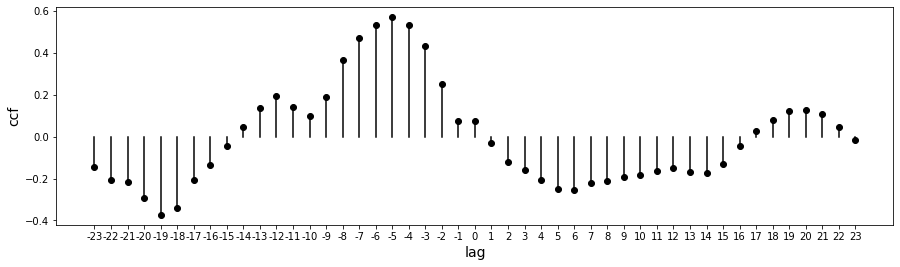

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

airmiles = pd.read_csv("http://image.cador.cn/data/airmiles.csv")
lakehuron = pd.read_csv("http://image.cador.cn/data/LakeHuron.csv")
lhdata = lakehuron.query("1937 <= year <= 1960")
x,y = airmiles.miles,lhdata.level

out = ccf(x,y)
plt.figure(figsize = (15,4)) 
for i in range(len(out)):
    plt.plot([i,i],[0,out[i]],'k-')
    plt.plot(i,out[i],'ko')

plt.xlabel("lag",fontsize=14)
plt.xticks(range(47),range(-23,24,1))
plt.ylabel("ccf",fontsize=14)
plt.show()